<a href="https://colab.research.google.com/github/valenciajaime/GCoupling_v0/blob/master/GCoupling_Fig42_2022_jun_24_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PORTADA (Gtierras)

Programa Coupling

Calculo de Sistemas de puesta a tierra.


Lenovo: Software_Coupling_2021

[Codigo En GitHub](https://github.com/valenciajaime/GCoupling_v0) Descargar modulo

[Paper Otero 1999](https://drive.google.com/file/d/1txaW0pMyonRAgEmT0E7t639PHU6dG-Eb/view?usp=sharing)

[Presentacion Coupling_Mod_GT07](https://docs.google.com/presentation/d/1N7nQ4oziwy3Nz3X21yOdRVkTiQkco0m-/edit?usp=sharing&ouid=115596684584813514481&rtpof=true&sd=true)


Autores: German Moreno, Carlos Cardenas, Hector D, Gomez, Walter M. Villa, Jaime A. Valencia.


Fecha: 2022-junio-24 viernes


Modulos que se deben cargar:

Modulo_GT07.py (Modulo actualizado a 24 de junio2022). 3 nuevas clases.



# Descripcion

**Objetivo:**

Reproducir casos para el libro de tierras. Este es el caso de la figura 4.2.

Contrapeso 70 metros.

Profundidad 0.5 metros.

Resistividad 100 Ohm-m.

Permitividad formula.

Imulso de 1 kA 1.2/50.





[libro Capitulo 4](https://docs.google.com/document/d/1lzkIKQoMII6ABE0-Utjo9XODYbw3BLHS/edit)

# Importacion de modulos

In [14]:
#importaciones
import os 
import numpy as np # entorno similar a Matlab
import matplotlib.pyplot as plt 
import matplotlib #ayuda matplotlib galery

#caso 
from scipy import optimize as OP
from scipy import integrate as IT
from Modulo_GT07 import *



# Caso: horizontal 70 m

In [ ]:
help(SPT_01)

Calculo electrodo horizontal de 70 m a 0.5 m de profundidad, con impedancia interna. Caso base con permitividad electrica con formula.


Figura 4.2 libro




In [15]:
### CODIGO PPAL############Tiempo ejecucion: 2m 25s
## Electrodo vertical
# Clase SPT_01()
# SPT_01(freq, ro=100, er=15, Kp=0, seg_i=4, K_zi=0, K_fr=0)
#        freq: frecuencia en Hz
#        ro: resistividad de tierra en ohms-m
#        er: permitividad electrica relativa
#        Kp: constante de propagacion
#        seg_i: segmentos de integracion numerica
#        K_zi: 0 sin calculo de impedancia conductor
#              1 con calculo de impedancia conductor
#        K_fr: 0 parametros no dependientes de la frecuencia

S1 = SPT_01(60, ro=100.0, er=15, Kp=0, seg_i=40, K_zi=1, K_fr=1)#Parametros SPT

##Datos conductores STP
##asumimos segmentos de 2 metros
ps=35 # particion 0- minima posible,  1 maxima posible, Mayor 1==numero segmentos

#Formato de datos conductor
#Ad = [Pi_x, Pi_y, Pi_z, Pf_x, Pf_y, Pf_z, Radioconduc, conductancia]
Conductancia = 4545454.54

####ediciones conductores [x1,y1,z1,x2,y2,z2, conductancia]
### z: profundidad positiva cuando esta enterrado
### Se asume un valor CUALQUIERA del radio del conductor.
Ad1 = [0,0,0.5,0,70,0.5,0.012, Conductancia]#conductor 1

#####  fin edicion
print("Datos leidos: \n",Ad1) #formato: Pi(x,y,z), Pf(x,y,z), Radio; conductividad

S1.Add_conduct([Ad1],ps) #funcion para adicionar conductores

print("\nClase Sistema de Puesta a Tierra: \n",S1)


Datos leidos: 
 [0, 0, 0.5, 0, 70, 0.5, 0.012, 4545454.54]
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo
!!!Segmento muy largo

Clase Sistema de Puesta a Tierra: 
 Instancia clase SPT_01
Archivo datos: Ninguno
Total Conductores: 1
Numero Nodos: 36
Numero Ramas: 35


Nodo origen:  21 (0.0, 0.0, 0.5)


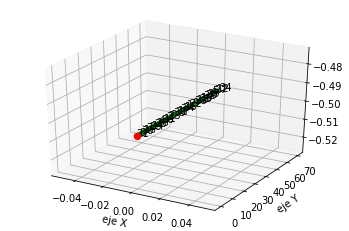

In [16]:
##visualiza nodos en conductor

#print("Numero de nodos: ",len(S1.L_nodos))

#obtener nodo origen
#for i,q in enumerate(S1.L_nodos):
#  nnn = int(q[0])
#  pro = nnn==0 or nnn==10 or nnn==20 or nnn==30 or nnn==40 or nnn==50 or nnn==60 or nnn==70
#  if pro and q[1]==0 and q[2]==0.5:
#    print("Nodo numero: ",i," Coord: ",q)
    

#N_ver = int(input("Nodo a ver: "))
#for q,i in enumerate(S1.L_nodos):
#  print(q,i)
# 20 (0.0, 0.0, 0.6)

Nodo_Ic = 21
print("Nodo origen: ",Nodo_Ic,S1.L_nodos[21])

S1.Show_nodos(Nodo_Ic)

# Calculo Zt (Solve_SPT01)

In [17]:
#se define la clase solucion con argumento el sistema
# de puesta a tierra S1
S_S1 = Solve_SPT01(S1)#clase solucion sistema puesta a tierra
print("Objeto S_S1: ",S_S1)

#calculo de impedancia de tierra una sola frecuencia

S_S1.Selec_cur(Nodo_Ic)#nodo de aplicacion de corriente
print("Frecuencia de calculo: ",S_S1.spt.freq)
print("Impedancia Tierra: ",round(S_S1.Zt_1f,5))

Objeto S_S1:  Clase solucion SPT
Z_tierra:  2.923757764248119
Frecuencia de calculo:  60
Impedancia Tierra:  2.92376


# Grafico Magnitud Zt(f)

Graficos de Gtierras suministrados por Hector David el 11 de marzo del 2022.

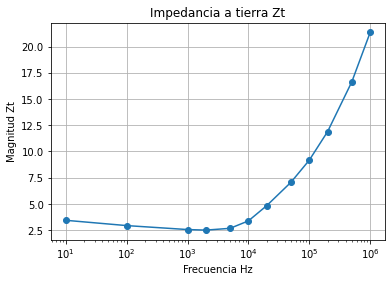

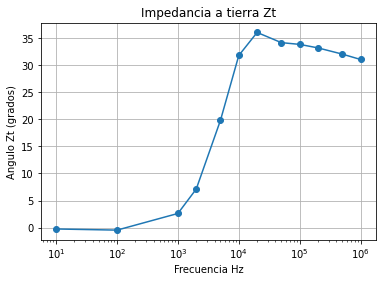

In [18]:
#Calculo impedancia a tierra un vector
# se programa metodO en clase Solve_SPT
#def Show_Zt_Freq(self):


S_S1.Selec_cur1([1,1,1,1,1,1,1,1,1,1,1,1],[1e1,1e2,1e3,2e3,5e3,1e4,2e4,5e4,1e5,2e5,5e5,1e6],Nodo_Ic)
S_S1.Show_Zt_Freq()

In [19]:
##Tabla de valores
print("==Freq===!=======Zt=======!====mag Zt=====")
for i,qz in enumerate(S_S1.HHz):
  
  s = "{:8.0f} !  {:7.4f} !   {:7.3f} !".format(qz,S_S1.ZZ[i],abs(S_S1.ZZ[i]))
  print(s)



==Freq===!=======Zt=======!====mag Zt=====
      10 !  3.4340-0.0156j !     3.434 !
     100 !  2.9299-0.0240j !     2.930 !
    1000 !  2.5498+0.1162j !     2.552 !
    2000 !  2.4794+0.3096j !     2.499 !
    5000 !  2.5115+0.9050j !     2.670 !
   10000 !  2.8716+1.7799j !     3.378 !
   20000 !  3.9077+2.8444j !     4.833 !
   50000 !  5.8416+3.9651j !     7.060 !
  100000 !  7.6143+5.1062j !     9.168 !
  200000 !  9.9513+6.5106j !    11.892 !
  500000 !  14.1031+8.8305j !    16.640 !
 1000000 !  18.2842+11.0112j !    21.344 !


# Generar señal  1.2/50

Generar señal de 1.2/50 en intervalo de 3 milisegundos. Usaremos nueva clase Signal_Gen01().

In [ ]:
#Señales generacion de señal
#signal01 = Signal_Gen01()
#signal01.Std2Dblexp(1.2,20)
#signal01.Show_SamplEDbexp()
#signal01.Make_file()


Numero de Muestras:  (260870, 2)
Atributos: T_onda, V_onda


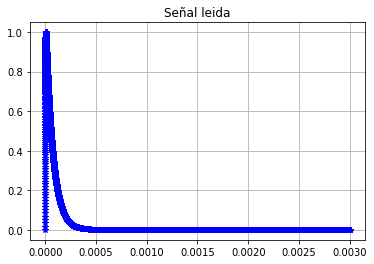

Tiempo final:  0.0029999935


In [22]:
#señal de corriente de inyeccion
#tomar señal del archivo generado por la objeto signal01
S_S1.Read_signal01("Onda12-50.txt")
print("Tiempo final: ",S_S1.T_onda[-1])

# Respuesta en el tiempo

Nodo inyeccion I:  21
Nodo Observacion V:  21


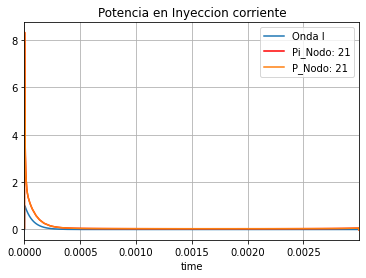

In [23]:
S_S1.Get_Vtime(Nodo_Ic,[Nodo_Ic],t_sup= S_S1.T_onda[-1]) 
#Nodo 21: origen (0,0,0.5)

#Datos Nodo inyeccion y nodos observacion 
#S_S1.V_t
#S_S1.Vver_t

Generando grafico en otros nodos: 10,20,30,40,50,60,70 mts
Nodo inyeccion I:  21
Nodo Observacion V:  29
Nodo Observacion V:  26
Nodo Observacion V:  33
Nodo Observacion V:  15
Nodo Observacion V:  13
Nodo Observacion V:  19
Nodo Observacion V:  34


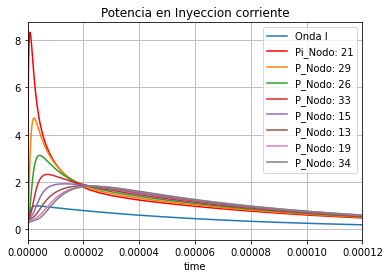

In [24]:

#### respuesta en nodos de 10,20,30,40,50,60,70 metros.
#####29, 26, 33,15,13, 19, 34

print("Generando grafico en otros nodos: 10,20,30,40,50,60,70 mts")

S_S1.Get_Vtime(Nodo_Ic,[29,26,33,15,13,19,34],t_sup= 12e-5)



# Resultados y conclusiones

**Resultados y analisis:**

GCoupling esta atenuando el sobre impulso usando impedancia interna y sin impedancia interna.







**Conclusiones:**




**Referencias:**